**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: JESSICA MELANI ROMERO LORA
*   MATRÍCULA: A01796083

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
import os
DIR = '/content/drive/MyDrive/MNA'
os.chdir(DIR)

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df_credit_risk = pd.read_csv("credit_risk_dataset.csv")
df_credit_risk.head(15)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


# **Parte 1**. Análisis descriptivo (univariante)

1. Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas cualitativas?

In [53]:
df_credit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
# ¿Cuántas columnas son numéricas y cuántas cualitativas?
# 7 columnas son numericas (int64- integer) y 4 columnas son cualitativas

 2. Determina el porcentaje de valores faltantes por columna.

In [7]:
df_credit_risk.isnull().sum() * 100 / df_credit_risk.shape[0]

,0
person_age,0.000000
person_income,0.000000
person_home_ownership,0.000000
person_emp_length,2.747000
loan_intent,0.000000
loan_grade,0.000000
loan_amnt,0.000000
loan_int_rate,9.563856
loan_status,0.000000
loan_percent_income,0.000000


# Análisis de variables numéricas

3. Obtén las siguientes estadísticas descriptivas para todas las variables numéricas:
*   Tendencia central (media, mediana)
*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)
*   Forma (asimetría y curtosis)
*   Clasifica las variables `person_age` y `loan_in_rate` según los valores observados de asimetría y curtosis

**NOTA**. Recuerda que muchas de estas estadísticas, puedes obtenerlas utilizando la función `describe()` y que la mediana está representada en el 2do cuartil (50%)

In [8]:
# Obtener la tendencia central para cada columna del dataframe:
df_credit_risk.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [9]:
# El promedio de edad es de 27.73 años, el minimo de edad es de 20 años, la mediana de la edad es de 26 años.
# El promedio de ingresos anuales es de $6,607.00 USD, el minimo es de $4,000.00 USD, la mediana de ingresos es de $5,500.00USD.
# El promedio de duracion del empleo en años es de 4.7, el valor minimo en ese rango es de 2 años y la mediana es de 4 años.
# El promedio de monto del prestamo es de $9,589.37USD, el minimo es de $500.00USD y la mediana es de $8,000.00USD
# El promedio de estatus del prestamo donde 0 indica no incumplimiento y 1 en mora es de 0.21 y la mediana es 0.
# El promedio de la tasa de interes del prestamo es de 11.01%, el minimo de esa tasa de interes es de 5.42% y la mediana es de 10.99%
# El promedio del porcentaje del ingreso destinado para cubrir el pago del prestamo es de 0.17% y la mediana es de 0.15%
# El promedio de duracion del historial crediticio es de 5.80 años y la mediana es de 4 años.

4. Utiliza histogramas para determinar la distribución de los valores representados en cada variable.
*   ¿Se corresponde con lo obtenido en el cálculo de asimetría? Como verás, los datos reales son más complejos que la teoría. Por esta razón, recuerda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma.

**NOTA**. Para esto también puedes ocupar los gráficos `kde` ([kernel density estimation](https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html)) que crean una curva continua y suave expandiendo la idea del histograma.

In [10]:
# Histogramas con estimacion de densidad de kermel por cada variable del conjunto de datos:

# **Variable 1. 'person_age' (Edad de la persona)**


---



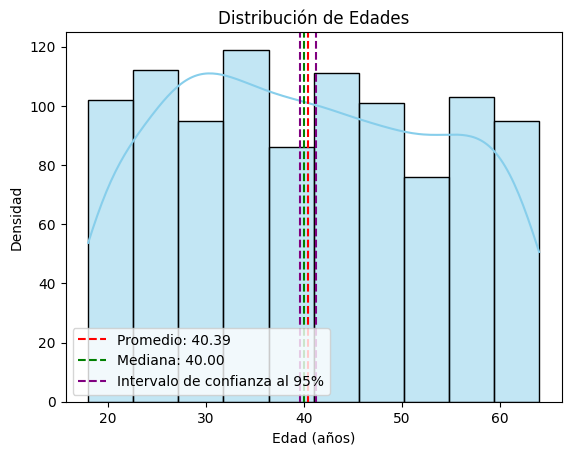

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

data = {'person_age': np.random.randint(18, 65, size=1000)}
df_credit_risk = pd.DataFrame(data)

promedio_edad = df_credit_risk['person_age'].mean()
mediana_edad = df_credit_risk['person_age'].median()
std_dev_edad = df_credit_risk['person_age'].std()

ci_edad = sm.stats.DescrStatsW(df_credit_risk['person_age']).tconfint_mean(alpha=0.05)

sns.histplot(data=df_credit_risk, x='person_age', bins=10, kde=True, color='skyblue')
plt.axvline(promedio_edad, color='red', linestyle='--', label=f'Promedio: {promedio_edad:.2f}')
plt.axvline(mediana_edad, color='green', linestyle='--', label=f'Mediana: {mediana_edad:.2f}')
plt.axvline(ci_edad[0], color='purple', linestyle='--', label=f'Intervalo de confianza al 95%')
plt.axvline(ci_edad[1], color='purple', linestyle='--')
plt.title("Distribución de Edades")
plt.xlabel("Edad (años)")
plt.ylabel("Densidad")
plt.legend()
plt.show()

# **Variable 2. 'person_income' (Ingresos anuales)**



---



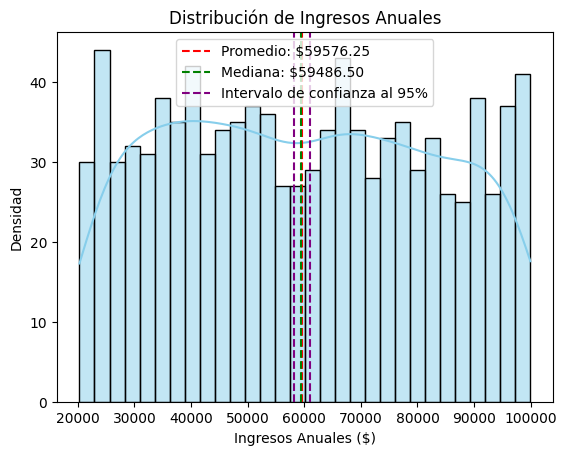

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

data = {'annual_income': np.random.randint(20000, 100000, size=1000)}
df_credit_risk = pd.DataFrame(data)

promedio = df_credit_risk['annual_income'].mean()
mediana = df_credit_risk['annual_income'].median()
std_dev = df_credit_risk['annual_income'].std()

ci = sm.stats.DescrStatsW(df_credit_risk['annual_income']).tconfint_mean(alpha=0.05)

sns.histplot(data=df_credit_risk, x='annual_income', bins=30, kde=True, color='skyblue')
plt.axvline(promedio, color='red', linestyle='--', label=f'Promedio: ${promedio:.2f}')
plt.axvline(mediana, color='green', linestyle='--', label=f'Mediana: ${mediana:.2f}')
plt.axvline(ci[0], color='purple', linestyle='--', label=f'Intervalo de confianza al 95%')
plt.axvline(ci[1], color='purple', linestyle='--')
plt.title("Distribución de Ingresos Anuales")
plt.xlabel("Ingresos Anuales ($)")
plt.ylabel("Densidad")
plt.legend()
plt.show()

# **Variable 3. 'person_emp_length' (Duracion del empleado)**


---



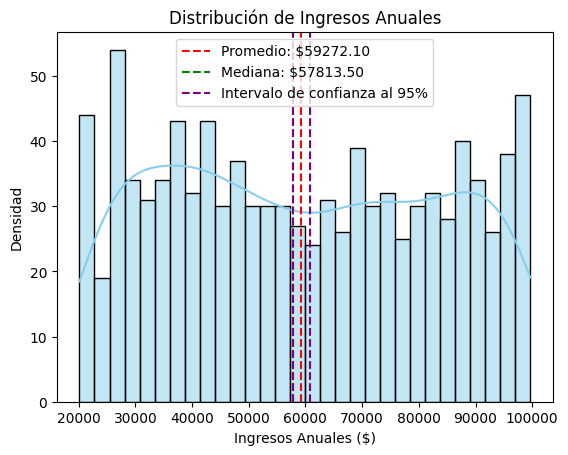

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

data = {'annual_income': np.random.randint(20000, 100000, size=1000)}
df_credit_risk = pd.DataFrame(data)

promedio = df_credit_risk['annual_income'].mean()
mediana = df_credit_risk['annual_income'].median()
std_dev = df_credit_risk['annual_income'].std()

ci = sm.stats.DescrStatsW(df_credit_risk['annual_income']).tconfint_mean(alpha=0.05)

sns.histplot(data=df_credit_risk, x='annual_income', bins=30, kde=True, color='skyblue')
plt.axvline(promedio, color='red', linestyle='--', label=f'Promedio: ${promedio:.2f}')
plt.axvline(mediana, color='green', linestyle='--', label=f'Mediana: ${mediana:.2f}')
plt.axvline(ci[0], color='purple', linestyle='--', label=f'Intervalo de confianza al 95%')
plt.axvline(ci[1], color='purple', linestyle='--')
plt.title("Distribución de Ingresos Anuales")
plt.xlabel("Ingresos Anuales ($)")
plt.ylabel("Densidad")
plt.legend()
plt.show()

# **Variable 4. Monto de la deuda (loan_amt)**

---



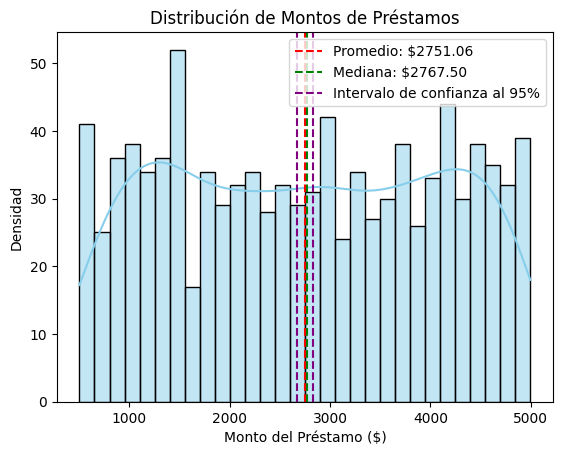

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

data = {'loan_amount': np.random.randint(500, 5000, size=1000)}
df_credit_risk = pd.DataFrame(data)

promedio = df_credit_risk['loan_amount'].mean()
mediana = df_credit_risk['loan_amount'].median()
std_dev = df_credit_risk['loan_amount'].std()

ci = sm.stats.DescrStatsW(df_credit_risk['loan_amount']).tconfint_mean(alpha=0.05)

sns.histplot(data=df_credit_risk, x='loan_amount', bins=30, kde=True, color='skyblue')
plt.axvline(promedio, color='red', linestyle='--', label=f'Promedio: ${promedio:.2f}')
plt.axvline(mediana, color='green', linestyle='--', label=f'Mediana: ${mediana:.2f}')
plt.axvline(ci[0], color='purple', linestyle='--', label=f'Intervalo de confianza al 95%')
plt.axvline(ci[1], color='purple', linestyle='--')
plt.title("Distribución de Montos de Préstamos")
plt.xlabel("Monto del Préstamo ($)")
plt.ylabel("Densidad")
plt.legend()
plt.show()

# **Variable 6. Interes de la deuda (loan_int_rate)**

---



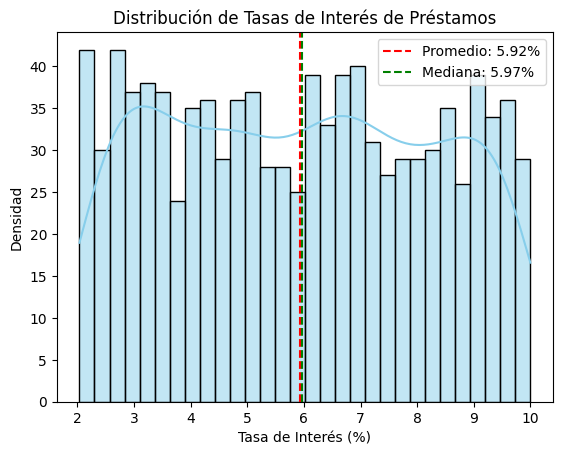

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)
data = {'loan_int_rate': np.random.uniform(2, 10, size=1000)}
df_credit_risk = pd.DataFrame(data)

promedio = df_credit_risk['loan_int_rate'].mean()
mediana = df_credit_risk['loan_int_rate'].median()
desviacion_estandar = df_credit_risk['loan_int_rate'].std()

sns.histplot(data=df_credit_risk, x='loan_int_rate', bins=30, kde=True, color='skyblue')
plt.axvline(promedio, color='red', linestyle='--', label=f'Promedio: {promedio:.2f}%')
plt.axvline(mediana, color='green', linestyle='--', label=f'Mediana: {mediana:.2f}%')
plt.title("Distribución de Tasas de Interés de Préstamos")
plt.xlabel("Tasa de Interés (%)")
plt.ylabel("Densidad")
plt.legend()
plt.show()

5. Emplea boxplots para mostrar la distribución de los datos a través de sus cuartiles.

# **Variable 7. Interes de la deuda (loan_status**


---



<ipython-input-125-02175ee2dfa6>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


count    1000.000000
mean        0.681000
std         0.466322
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: loan_status, dtype: float64


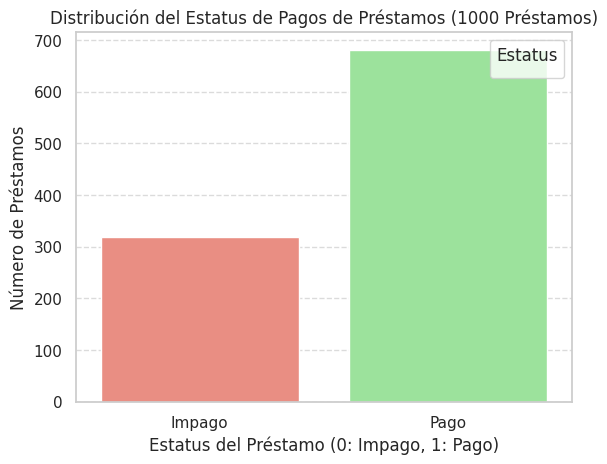

In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)
data = {
    'loan_status': np.random.choice([0, 1], size=1000, p=[0.3, 0.7]),
    'loan_amount': np.random.randint(500, 5001, size=1000),
}
df = pd.DataFrame(data)

print(df['loan_status'].describe())

custom_palette = ['salmon', 'lightgreen']
sns.countplot(
    x='loan_status',
    data=df,
    palette=custom_palette
)

plt.title('Distribución del Estatus de Pagos de Préstamos (1000 Préstamos)')

plt.xlabel('Estatus del Préstamo (0: Impago, 1: Pago)')
plt.xticks([0, 1], ['Impago', 'Pago'])
plt.ylabel('Número de Préstamos')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend(title='Estatus', loc='upper right')
plt.show()

*   Como podrás observar hay valores atípicos en todas las variables. Ejecuta el siguiente código para identificar los valores atípicos en la variable `person_age`

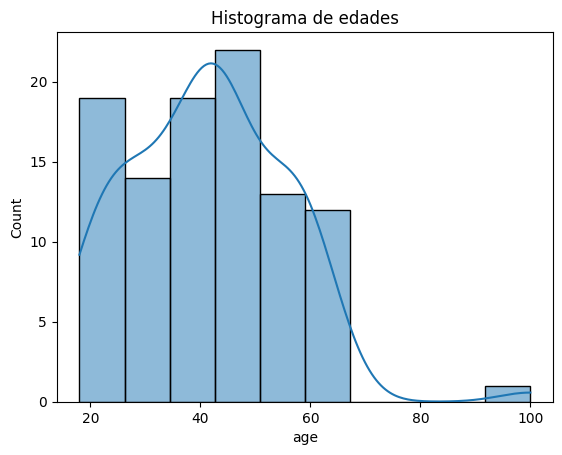

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {'age': np.random.randint(18, 65, size=100)}
data['age'][50] = 100

df = pd.DataFrame(data)

sns.histplot(data=df, x='age', bins=10, kde=True)
plt.title('Histograma de edades')
plt.show()

# Análisis de variables de texto

 6. Obtén las siguientes estadísticas descriptivas para todas las variables de texto:
*   Tendencia central (moda)
*   Cardinalidad (cantidad de valores únicos)
*   Recuentos únicos (número de ocurrencias para cada valor único)

**NOTA**. Un resumen de estas estadísticas, puedes obtenerlas indicando en la función `describe()` que se incluirán sólo las variables de tipo object: `describe(include = 'object')`. Para los recuentos utiliza la función `df['columna'].value_counts()`

In [98]:
for column in df_credit_risk.select_dtypes(include=['object']):
  print(f"Mode for {column}: {df_credit_risk[column].mode()[0]}")

for column in df_credit_risk.select_dtypes(include=['object']):
  print(f"Cardinality for {column}: {df_credit_risk[column].nunique()}")

for column in df_credit_risk.select_dtypes(include=['object']):
  print(f"Unique value counts for {column}:\n{df_credit_risk[column].value_counts()}")


Mode for person_home_ownership: RENT
Mode for loan_intent: EDUCATION
Mode for loan_grade: A
Mode for cb_person_default_on_file: N
Cardinality for person_home_ownership: 4
Cardinality for loan_intent: 6
Cardinality for loan_grade: 7
Cardinality for cb_person_default_on_file: 2
Unique value counts for person_home_ownership:
person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64
Unique value counts for loan_intent:
loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64
Unique value counts for loan_grade:
loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64
Unique value counts for cb_person_default_on_file:
cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64


In [99]:
df_credit_risk.describe(include = 'object')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


In [100]:
categorical_df = df_credit_risk[['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']]

print(categorical_df.describe())

for column in categorical_df.columns:
    print(f"\nValue counts for {column}:")
    print(categorical_df[column].value_counts())

       person_home_ownership loan_intent loan_grade cb_person_default_on_file
count                  32581       32581      32581                     32581
unique                     4           6          7                         2
top                     RENT   EDUCATION          A                         N
freq                   16446        6453      10777                     26836

Value counts for person_home_ownership:
person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

Value counts for loan_intent:
loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

Value counts for loan_grade:
loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

Value counts for cb_person_default_on_file:
cb_person_default_on_file
N    2683

In [103]:
for column in df_credit_risk.select_dtypes(include=['object']):
    mode_value = df_credit_risk[column].mode()[0]
    cardinality = df_credit_risk[column].nunique()
    unique_counts = df_credit_risk[column].value_counts()

    results.append({
        'Column': column,
        'Mode': mode_value,
        'Cardinality': cardinality,
        'Unique Value Counts': unique_counts.to_dict()
    })

df_final_cuali = pd.DataFrame(results)

print(df_final_cuali)
df_final_cuali

                       Column       Mode  Cardinality  \
0       person_home_ownership       RENT            4   
1                 loan_intent  EDUCATION            6   
2                  loan_grade          A            7   
3   cb_person_default_on_file          N            2   
4       person_home_ownership       RENT            4   
5                 loan_intent  EDUCATION            6   
6                  loan_grade          A            7   
7   cb_person_default_on_file          N            2   
8       person_home_ownership       RENT            4   
9                 loan_intent  EDUCATION            6   
10                 loan_grade          A            7   
11  cb_person_default_on_file          N            2   
12      person_home_ownership       RENT            4   
13                loan_intent  EDUCATION            6   
14                 loan_grade          A            7   
15  cb_person_default_on_file          N            2   
16      person_home_ownership  

,Column,Mode,Cardinality,Unique Value Counts
0,person_home_ownership,RENT,4,"{'RENT': 16446, 'MORTGAGE': 13444, 'OWN': 2584..."
1,loan_intent,EDUCATION,6,"{'EDUCATION': 6453, 'MEDICAL': 6071, 'VENTURE'..."
2,loan_grade,A,7,"{'A': 10777, 'B': 10451, 'C': 6458, 'D': 3626,..."
3,cb_person_default_on_file,N,2,"{'N': 26836, 'Y': 5745}"
4,person_home_ownership,RENT,4,"{'RENT': 16446, 'MORTGAGE': 13444, 'OWN': 2584..."
5,loan_intent,EDUCATION,6,"{'EDUCATION': 6453, 'MEDICAL': 6071, 'VENTURE'..."
6,loan_grade,A,7,"{'A': 10777, 'B': 10451, 'C': 6458, 'D': 3626,..."
7,cb_person_default_on_file,N,2,"{'N': 26836, 'Y': 5745}"
8,person_home_ownership,RENT,4,"{'RENT': 16446, 'MORTGAGE': 13444, 'OWN': 2584..."
9,loan_intent,EDUCATION,6,"{'EDUCATION': 6453, 'MEDICAL': 6071, 'VENTURE'..."


In [63]:
df_credit_risk['person_home_ownership'].value_counts()

,count
person_home_ownership,
RENT,16446
MORTGAGE,13444
OWN,2584
OTHER,107


In [68]:
df_credit_risk.describe(include = 'object')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


In [59]:
number_cols = df_credit_risk.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df_credit_risk.select_dtypes(exclude=np.number).columns.tolist()

for column in categorical_cols:
    print(df_credit_risk[column].value_counts())
    print('-' * 50)

person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64
--------------------------------------------------
loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64
--------------------------------------------------
loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64
--------------------------------------------------
cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64
--------------------------------------------------


In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = df_credit_risk.select_dtypes(exclude=np.number).columns.tolist()

results = []

for column in categorical_cols:
    value_counts = df_credit_risk[column].value_counts()

    for value, count in value_counts.items():
        results.append({'Column': column, 'Value': value, 'Count': count})

df_value_counts = pd.DataFrame(results)

print(df_value_counts)

                       Column              Value  Count
0       person_home_ownership               RENT  16446
1       person_home_ownership           MORTGAGE  13444
2       person_home_ownership                OWN   2584
3       person_home_ownership              OTHER    107
4                 loan_intent          EDUCATION   6453
5                 loan_intent            MEDICAL   6071
6                 loan_intent            VENTURE   5719
7                 loan_intent           PERSONAL   5521
8                 loan_intent  DEBTCONSOLIDATION   5212
9                 loan_intent    HOMEIMPROVEMENT   3605
10                 loan_grade                  A  10777
11                 loan_grade                  B  10451
12                 loan_grade                  C   6458
13                 loan_grade                  D   3626
14                 loan_grade                  E    964
15                 loan_grade                  F    241
16                 loan_grade                  G

7. Utiliza gráficos de barras por variable para representar la frecuencia de cada categoría.
**bold text**
**NOTA**. seaborn posee un gráfico de recuento, para variables de tipo object, que calcula la frecuencia de cada categoría sin necesidad de utilizar la función `value_counts()`. Para generarlo debes indicar la columna: `sns.countplot(x='columna', data=df) `

<ipython-input-110-60309b0a204d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_credit_risk, palette="Set2", edgecolor=".2")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When groupin

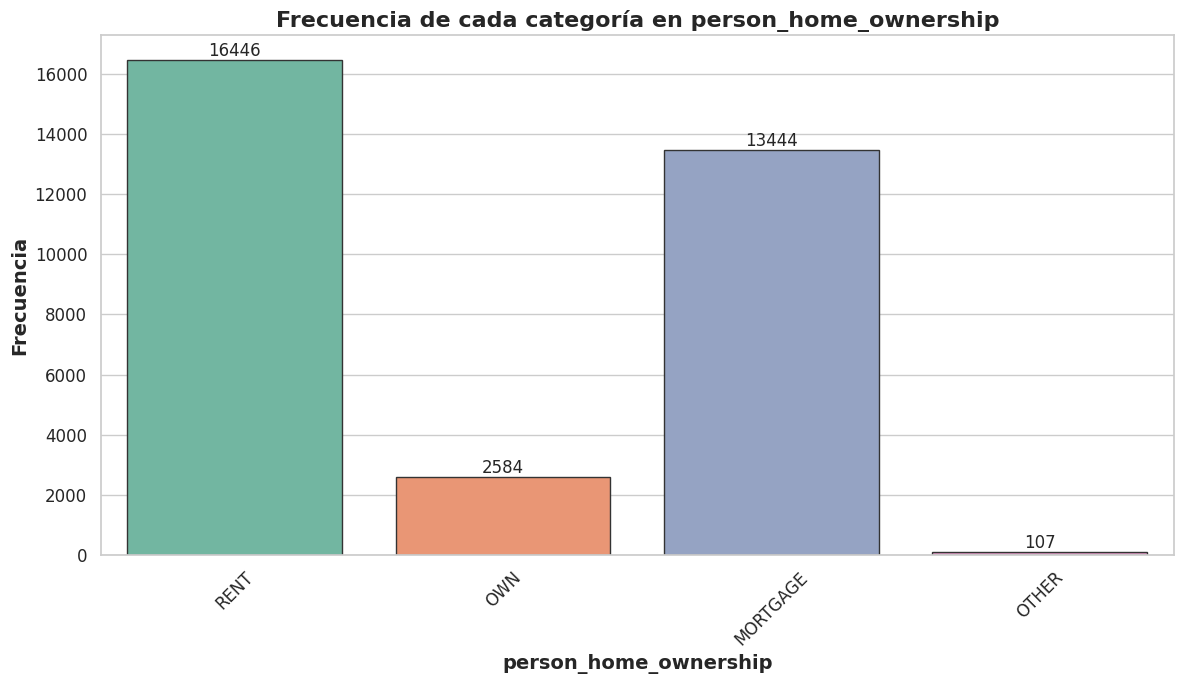

<ipython-input-110-60309b0a204d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_credit_risk, palette="Set2", edgecolor=".2")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When groupin

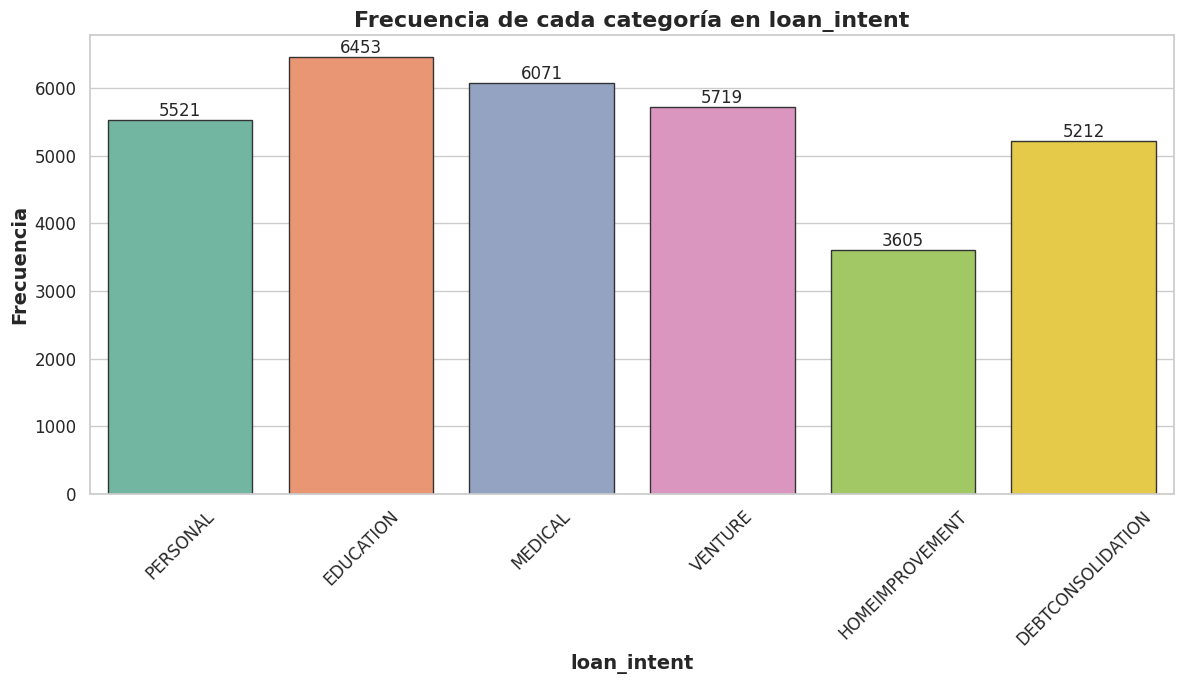

<ipython-input-110-60309b0a204d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_credit_risk, palette="Set2", edgecolor=".2")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When groupin

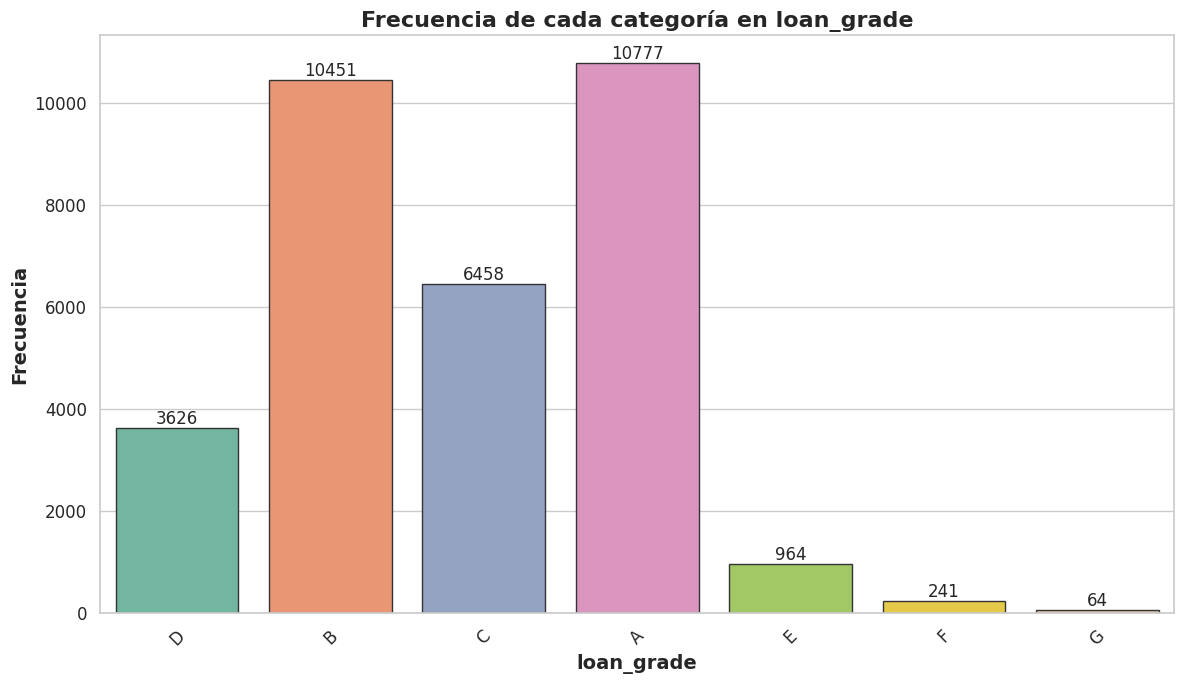

<ipython-input-110-60309b0a204d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_credit_risk, palette="Set2", edgecolor=".2")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


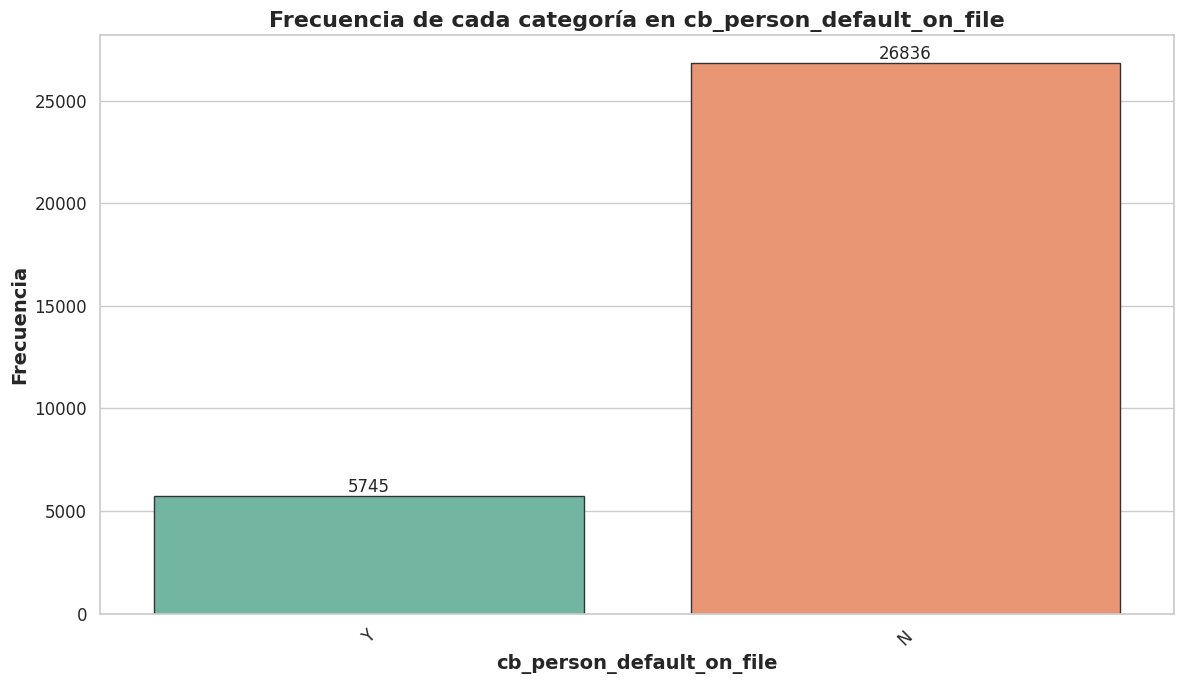

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel")

categorical_cols = df_credit_risk.select_dtypes(exclude=np.number).columns.tolist()

for column in categorical_cols:
    plt.figure(figsize=(12, 7))

    sns.countplot(x=column, data=df_credit_risk, palette="Set2", edgecolor=".2")

    plt.title(f'Frecuencia de cada categoría en {column}', fontsize=16, weight='bold')
    plt.xlabel(column, fontsize=14, weight='bold')
    plt.ylabel('Frecuencia', fontsize=14, weight='bold')
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)

    for p in plt.gca().patches:
        plt.text(p.get_x() + p.get_width() / 2., p.get_height(), int(p.get_height()),
                 ha='center', va='bottom', fontsize=12)

    plt.tight_layout()
    plt.show()


In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [115]:
categorical_df = df_credit_risk[['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']]
categorical_df.head(25)

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,PERSONAL,D,Y
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y
5,OWN,VENTURE,A,N
6,RENT,EDUCATION,B,N
7,RENT,MEDICAL,B,N
8,RENT,PERSONAL,A,N
9,OWN,VENTURE,D,N


# **Parte 2**. Análisis de correlación (bivariante y multivariante)

La variable `loan_status` será la variable de salida (o a predecir en un modelo de ML). Analiza su relación con el resto de las variables a través de los siguientes gráficos:

8. Un box plot para visualizar la distribución de `loan_percent_income` según el `loan_status`. Interpreta el resultado.

<ipython-input-118-d720bfea17b7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='loan_percent_income', data=df_credit_risk, palette="Set2")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a lengt

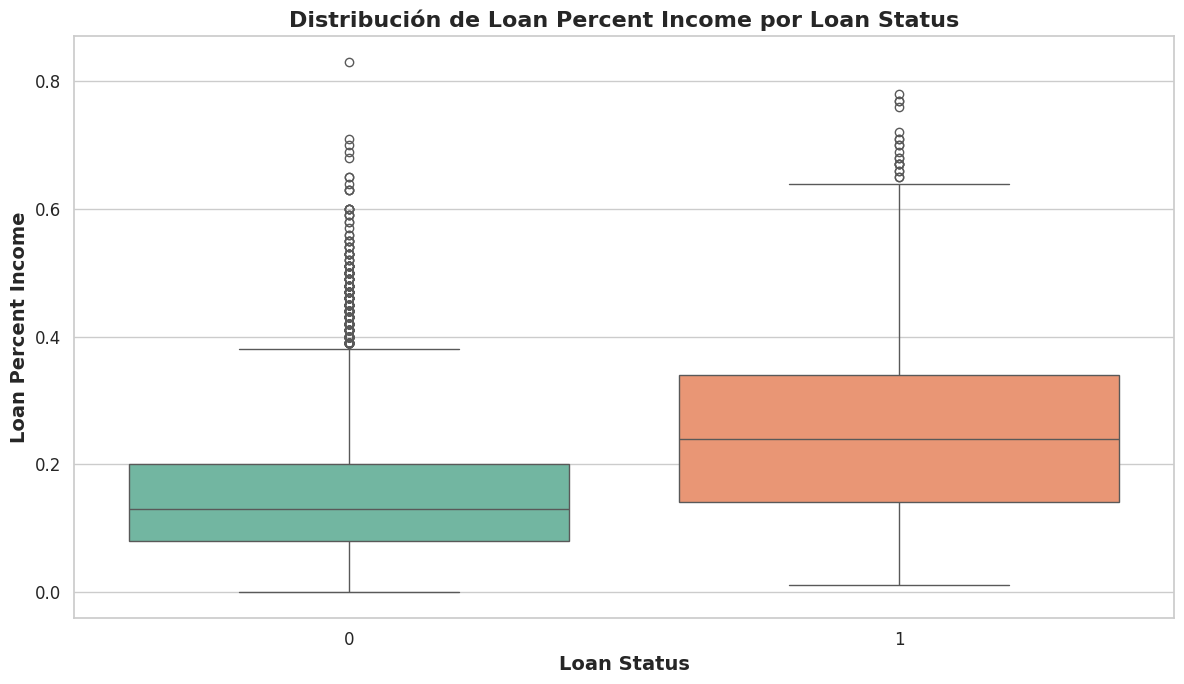

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.boxplot(x='loan_status', y='loan_percent_income', data=df_credit_risk, palette="Set2")

plt.title('Distribución de Loan Percent Income por Loan Status', fontsize=16, weight='bold')
plt.xlabel('Loan Status', fontsize=14, weight='bold')
plt.ylabel('Loan Percent Income', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

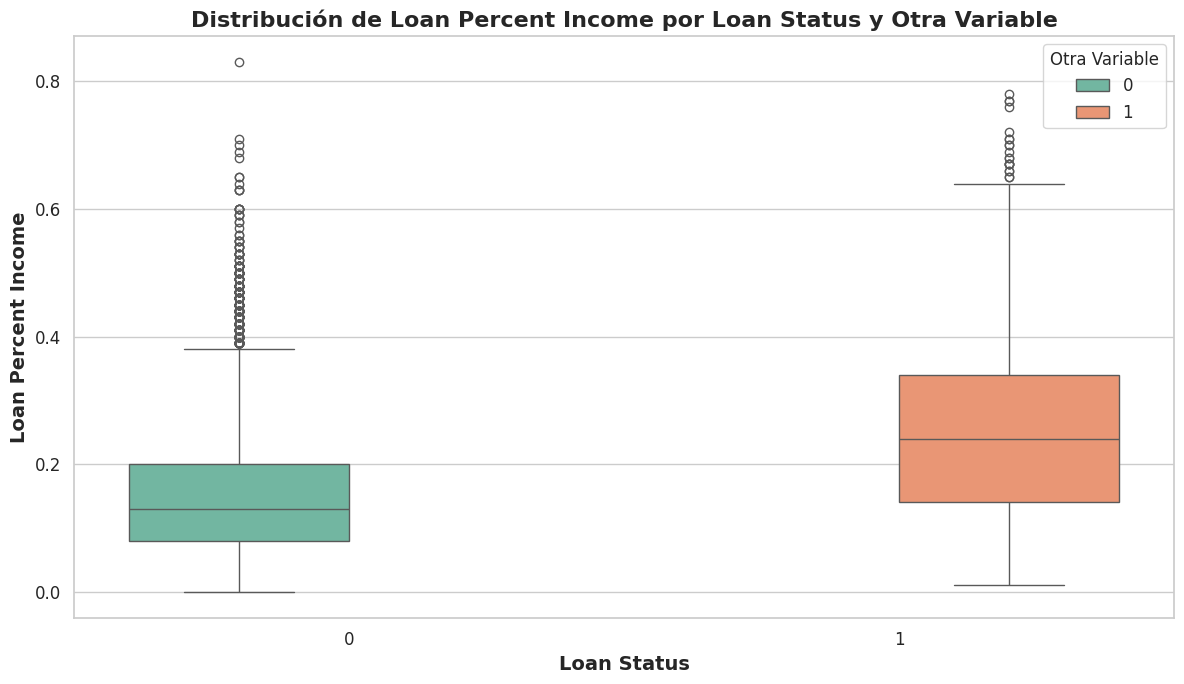

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.boxplot(x='loan_status', y='loan_percent_income', hue='loan_status',
            data=df_credit_risk, palette="Set2", dodge=True)

plt.title('Distribución de Loan Percent Income por Loan Status y Otra Variable', fontsize=16, weight='bold')
plt.xlabel('Loan Status', fontsize=14, weight='bold')
plt.ylabel('Loan Percent Income', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(title='Otra Variable', fontsize=12)

plt.tight_layout()
plt.show()


 9. En los gráficos de barras que obtuviste en el ejercicio 7, separa el conteo según el `load_status`, utilizando el parámetro `hue`.

count    1000.000000
mean        0.681000
std         0.466322
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: loan_status, dtype: float64


<ipython-input-128-5c61b8d7d140>:19: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `

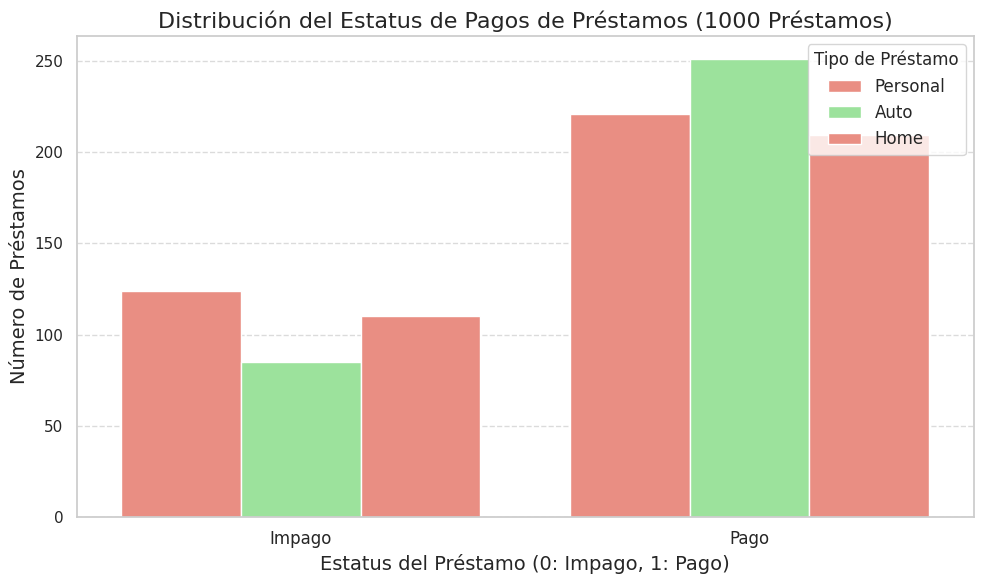

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)
data = {
    'loan_status': np.random.choice([0, 1], size=1000, p=[0.3, 0.7]),
    'loan_amount': np.random.randint(500, 5001, size=1000),
    'loan_type': np.random.choice(['Personal', 'Home', 'Auto'], size=1000)
}
df = pd.DataFrame(data)

print(df['loan_status'].describe())

custom_palette = ['salmon', 'lightgreen']

plt.figure(figsize=(10, 6))
sns.countplot(
    x='loan_status',
    hue='loan_type',
    data=df,
    palette=custom_palette
)

plt.title('Distribución del Estatus de Pagos de Préstamos (1000 Préstamos)', fontsize=16)
plt.xlabel('Estatus del Préstamo (0: Impago, 1: Pago)', fontsize=14)
plt.xticks([0, 1], ['Impago', 'Pago'], fontsize=12)
plt.ylabel('Número de Préstamos', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Tipo de Préstamo', loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()


10. Un mapa de calor con los valores de correlación de todas las variables del dataframe.
*   ¿Qué variable tiene mayor correlación con `loan_status`?

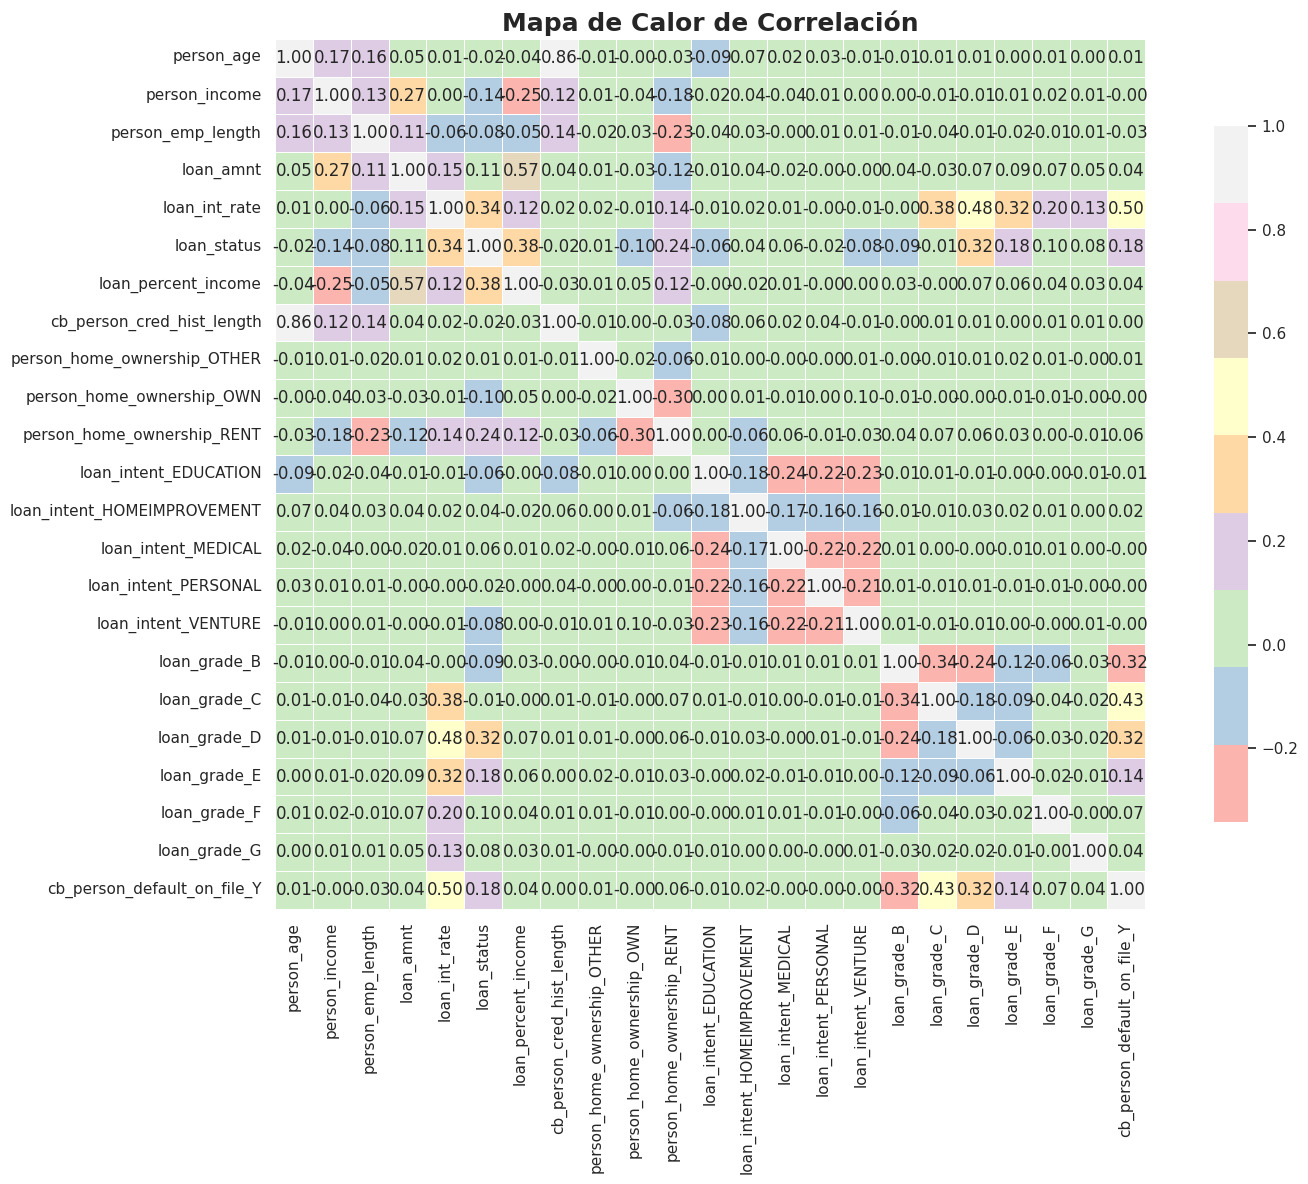

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

columns_of_interest = [
    'person_age',
    'person_income',
    'person_home_ownership',
    'person_emp_length',
    'loan_intent',
    'loan_grade',
    'loan_amnt',
    'loan_int_rate',
    'loan_status',
    'loan_percent_income',
    'cb_person_default_on_file',
    'cb_person_cred_hist_length'
]

df_filtered = df_credit_risk[columns_of_interest]

df_filtered_encoded = pd.get_dummies(df_filtered, drop_first=True)

correlation_matrix = df_filtered_encoded.corr()

plt.figure(figsize=(16, 12))

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='Pastel1',
    square=True,
    cbar_kws={"shrink": .8},
    linewidths=0.5
)

plt.title('Mapa de Calor de Correlación', fontsize=18, weight='bold')
plt.tight_layout()

plt.show()


In [ ]:
# OBSERVACIONES:

# 1. Podemos observar que la variable que posee una mayor correlacion con 'loan_status' es
# 'loan_percent_income' (0.38), esto nos indica que el estatus del prestamo (donde 0 indica pago efectuado
# y 1 moroso) tiene una relacion importante con el ingreso de las personas deudoras.
# Esto tiene sentido tomando en cuenta que los ingresos son un factor importante para
# determinar el pago de una deuda, por lo que seria pertinente elaborar una matriz de
# correlacion con los ingresos mas altos de los deudores y los pagos completados,
# esto con el objetivo de identificar si a mayor ingreso mayor capacidad de pago de la deuda.

# 2. Por otra parte identifico que la variable loan_int_rate tiene una correlacion positiva con
# loan_status, lo cual nos indica que los intereses del prestamo tienen una relacion de (0.34)
# con el estado de pago del mismo. Como se menciono anteriormente esto tiene sentido, tomando
# en cuenta que la tasa de interes de un prestamo juega un papel central para determinar
# el pago de la misma, mientras que los atrasos en el pago incrementan la tasa de interes,
# por lo tanto podemos identificar una correspondencia entre ambas variables.

# 3.  De igual forma podemos observar una correlacion notable entre las variables 'person_income'
# y 'loan_ammount' con un valor de 0.27, la asociacion entre ambas puede ser interpretada bajo la
# idea de que el ingreso de las personas tiene que ver con la cantidad de prestamo aprobada. Esto
# es interesante porque nos indica que dependiendo de los ingresos de las personas la cantidad del
# prestamo tendra a variar. Esta variabilidad evidentemente puede ser utilizada a favor de los
# conglomerados bancarios que aprueban los creditos en funcion de los ingresos de sus clientes, es
# decir de su capacidad de pago.